In [1]:
import sys
sys.path.append('/home/kevinteng/Desktop/BrainTumourSegmentation')
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from utils_vis import *
from model import *
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import medpy.io
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
#model weights for corresponding model
ver = 'model_model_self_attention_02.h5'
#path where model weights is stored
model_weights = '/home/kevinteng/Desktop/model_weights/'+ver
#build model and load weights
input = Input([240,240,4])
model = Model(input, selfGuidedAtt_v01(input))
model.load_weights(model_weights)

(155, 240, 240, 5)



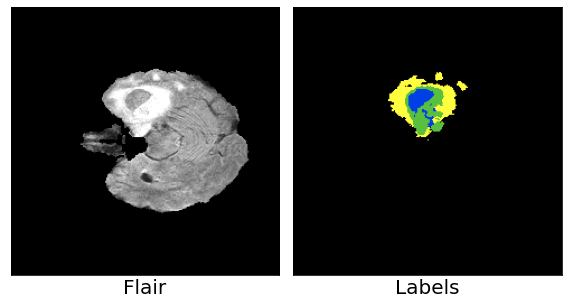

In [3]:
#path where training dataset is stored
train_ds_path = '/home/kevinteng/Desktop/ssd02/BraTS2020_preprocessed03/Training_pre/'
patients = sorted(os.listdir(train_ds_path))
sample = patients[0]
patient01 = np.load(train_ds_path+sample)
#pick middle slice of the patient
print(patient01.shape)
slice = 50
captions = ['Flair', 'Labels']
input_img = [patient01[slice,...,0], plot_labels_color(patient01[slice,...,-1])]
plot_comparison(input_img, captions, n_col=len(captions), figsize=(8,8))

In [4]:
model_inp = patient01[slice,:,:,:4]
model_inp = tf.expand_dims(model_inp, axis=0)
output_xent, output_dice, gated_attention, f_pc = model(model_inp)

Plot segmentation output for Xent for Deep Supervision

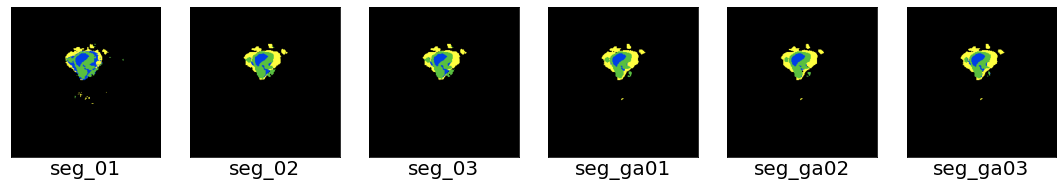

In [5]:
from tensorflow.keras.layers import Softmax
argmax_seg = [plot_labels_color(np.squeeze(np.argmax(Softmax()(imgs), -1))) for imgs in output_xent]
captions = ['seg_01', 'seg_02', 'seg_03', 'seg_ga01', 'seg_ga02', 'seg_ga03']
plot_comparison(argmax_seg, captions, n_col=len(captions), figsize=(15,15))

Plot Segmentation output for Dice Coefficient

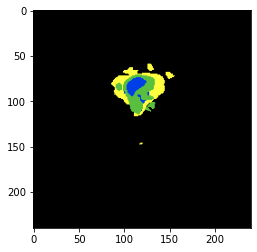

In [6]:
plt.imshow(plot_labels_color(tf.squeeze(np.argmax(output_dice,-1))))

In [7]:
# training_output_path = '/home/kevinteng/Desktop/ssd02/submission/Training_pre_model_self_attention_02/'
# training_output_patient = sorted(os.listdir(training_output_path))
# patient_seg = training_output_patient[0]
# seg, _ = medpy.io.load(training_output_path+patient_seg)
# plt.imshow(plot_labels_color(seg[:,:,slice]))


 Gated Attention

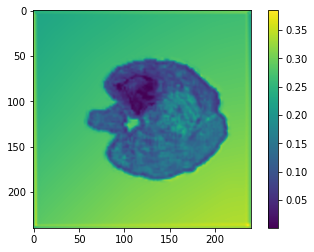

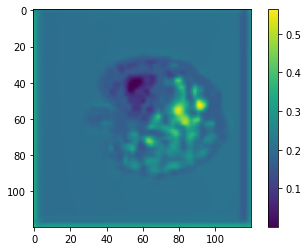

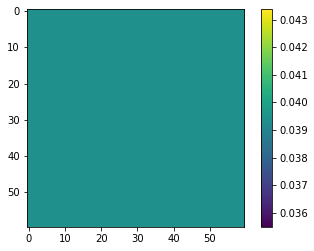

In [8]:
#len(gated_attention)=3
for alpha in gated_attention:
    plt.imshow(tf.squeeze(alpha))
    plt.colorbar()
    plt.show()

Plot PAM and CAM feature maps

In [38]:
def grid_plot_pcam(f_channel, ncols=8, cmap='jet',
                   save_as='png', save_name=None, save_dpi = 600,
                    figsize=(18, 18), axes_pad=0.05):

    fig = plt.figure(figsize=figsize)
    nimgs = f_channel.shape[-1]
    nrows = nimgs//ncols 
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=axes_pad)
    
    input_imgs = [np.squeeze(f_channel[...,i]) for i in range(nimgs)]
    for ax, im in zip(grid, input_imgs):
        for i in range(0,nimgs,ncols):
                imgx = ax.imshow(im, cmap=cmap)
                ax.set_xticks([])
                ax.set_yticks([])
    #save as high res format
    if save_name!=None:
        plt.savefig('/home/kevinteng/Desktop/ssd02/eps/{}.{}'.format(save_name, save_as), 
                    format=save_as, save_dpi=save_dpi)
    plt.show()

In [40]:
print(len(f_pc))

3


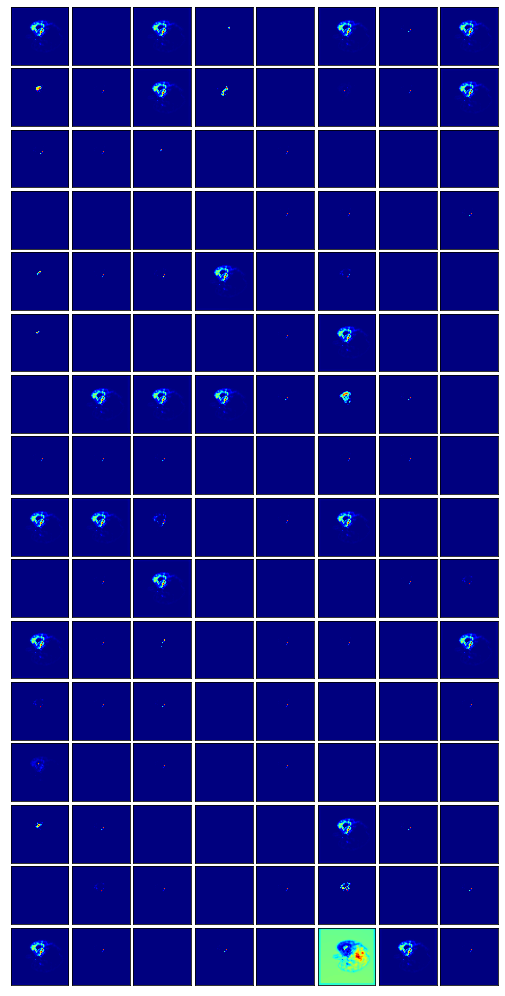

PAM_0


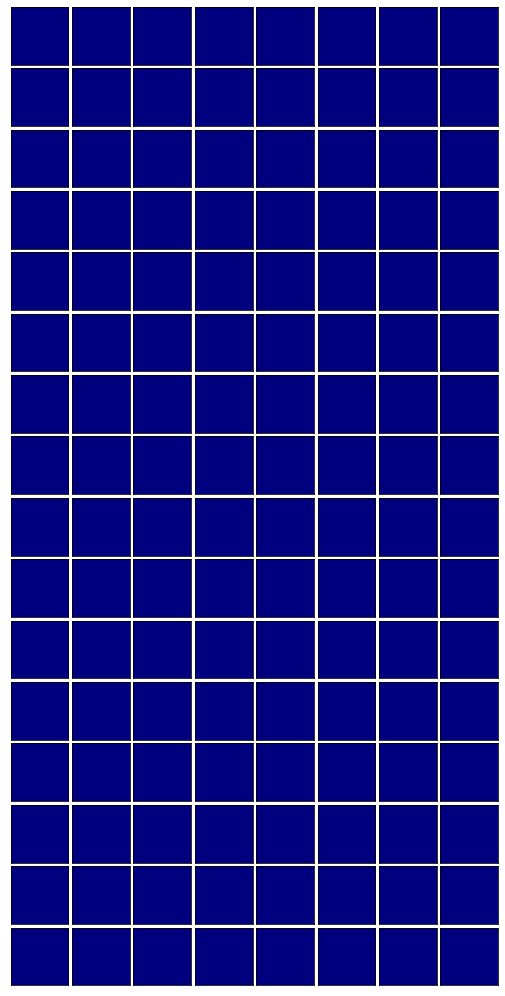

CAM_0



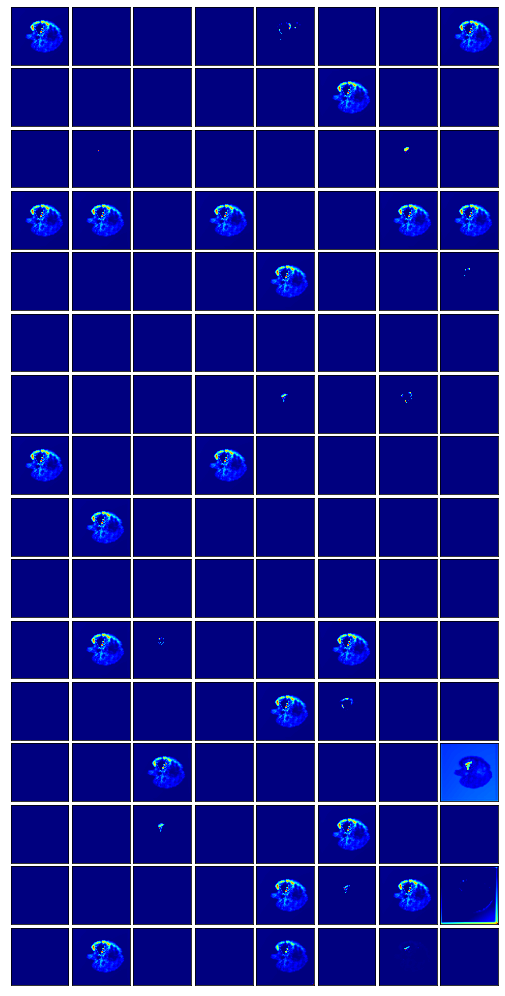

PAM_1


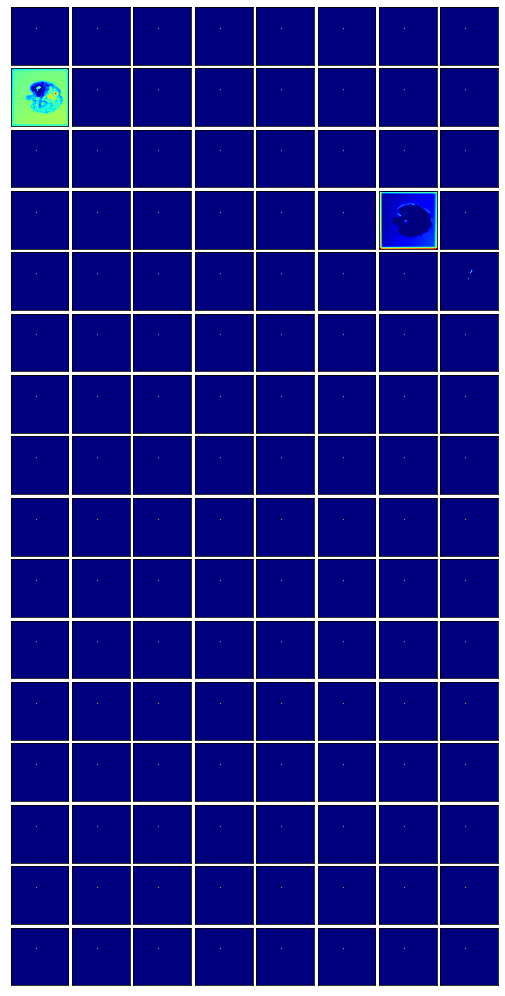

CAM_1



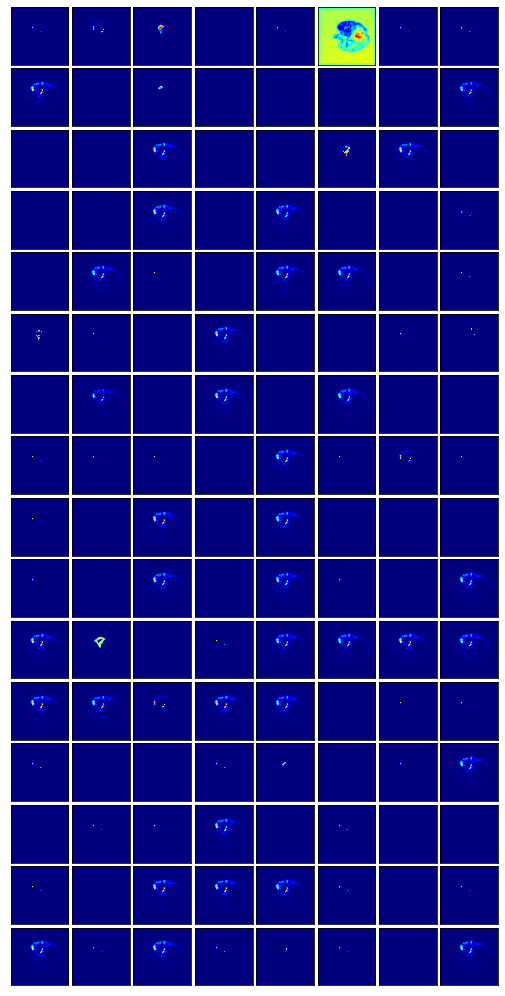

PAM_2


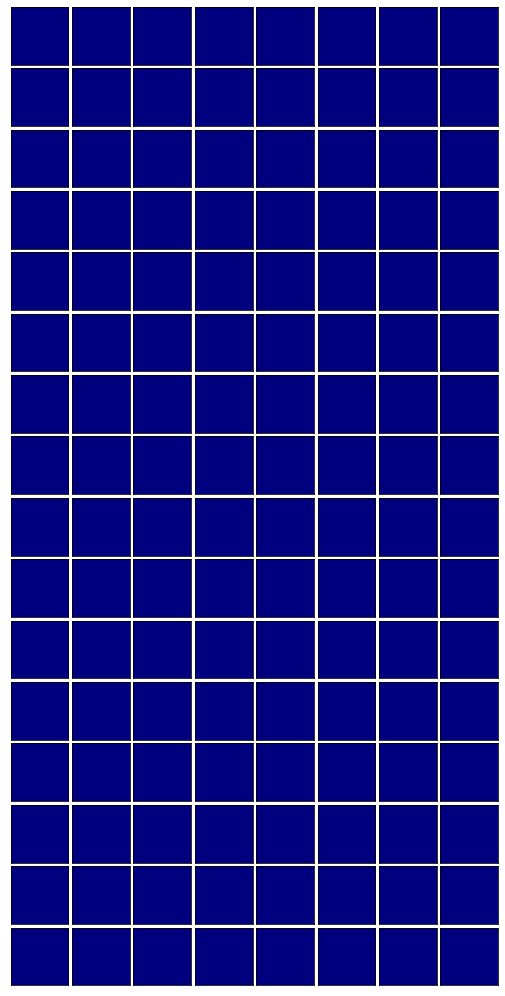

CAM_2



In [42]:
for i in range(len(f_pc)):
    for j in range(len(f_pc[0])):
        grid_plot_pcam(f_pc[i][j])
        if j==0:
            print('PAM_{}'.format(i))
        else:
            print('CAM_{}'.format(i))
    print()

Taking Max along the features

PAM_0


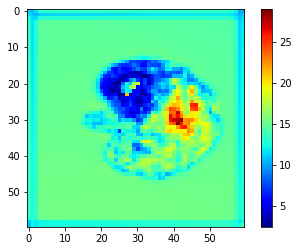

CAM_0


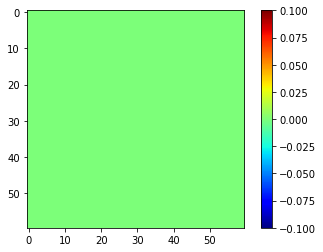

PAM_1


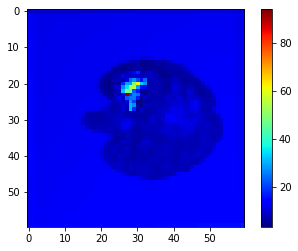

CAM_1


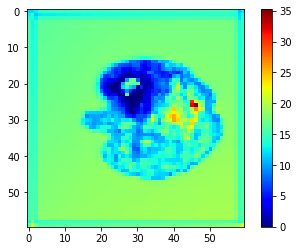

PAM_2


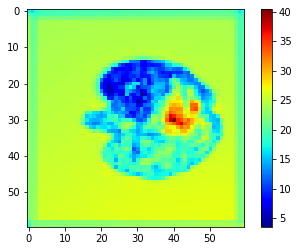

CAM_2


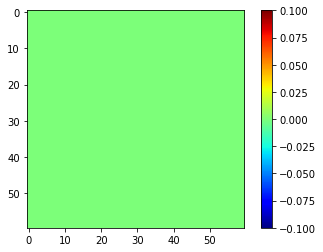

In [12]:
for i in range(len(f_pc)):
    for j in range(len(f_pc[0])):
        plt.imshow(np.squeeze(np.max(f_pc[i][j],-1)), cmap='jet')
        plt.colorbar()
        if j==0:
            print('PAM_{}'.format(i))
        else:
            print('CAM_{}'.format(i))
        plt.show()